In [1]:
## importing some python libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [2]:
##loading the dataset
df=pd.read_csv('packets-phase2-2018-02-23-labelled UPDATED NEW.csv')

In [3]:
df.head(10)

,protocol,sourcePort,destPort,size,fragmented,seqNumber,ackNumber,flags,classification
0,20,36770,3306,57,0,1593567516,-157561674,24.0,0
1,20,3306,36770,63,0,-157561674,1593567521,24.0,0
2,20,36770,3306,52,0,1593567521,-157561663,16.0,0
3,20,36770,3306,90,0,1593567521,-157561663,24.0,0
4,20,3306,36770,63,0,-157561663,1593567559,24.0,0
5,20,36770,3306,73,0,1593567559,-157561652,24.0,0
6,20,3306,36770,63,0,-157561652,1593567580,24.0,0
7,20,36770,3306,90,0,1593567580,-157561641,24.0,0
8,20,3306,36770,2232,0,-157561641,1593567618,24.0,0
9,20,36770,3306,52,0,1593567618,-157559461,16.0,0


In [4]:
## empty value in the dataset 
df.isnull().sum()

protocol            0
sourcePort          0
destPort            0
size                0
fragmented          0
seqNumber           0
ackNumber           0
flags             588
classification      0
dtype: int64

In [5]:
df.describe()

,protocol,sourcePort,destPort,size,fragmented,seqNumber,ackNumber,flags,classification
count,469478.000000,469478.000000,469478.000000,469478.000000,469478.0,4.694780e+05,4.694780e+05,468890.000000,469478.000000
mean,19.987678,23894.760274,22463.332533,557.937993,0.0,-2.958717e+07,-7.620682e+07,19.229630,0.350342
std,0.348759,22666.822519,22891.949389,1491.483765,0.0,1.185537e+09,1.170913e+09,4.995983,0.477078
min,10.000000,0.000000,0.000000,32.000000,0.0,-2.147161e+09,-2.147161e+09,2.000000,0.000000
25%,20.000000,80.000000,80.000000,52.000000,0.0,-1.016543e+09,-1.092281e+09,16.000000,0.000000
50%,20.000000,34142.000000,3306.000000,63.000000,0.0,-1.186809e+08,-1.023749e+08,17.000000,0.000000
75%,20.000000,41230.000000,41232.000000,122.000000,0.0,9.349077e+08,9.347859e+08,24.000000,1.000000
max,20.000000,65371.000000,65371.000000,16424.000000,0.0,2.147004e+09,2.147004e+09,24.000000,1.000000


In [6]:
df.columns

Index(['protocol', 'sourcePort', 'destPort', 'size', 'fragmented', 'seqNumber',
       'ackNumber', 'flags', 'classification'],
      dtype='object')

In [7]:
df.shape

(469478, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469478 entries, 0 to 469477
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   protocol        469478 non-null  int64  
 1   sourcePort      469478 non-null  int64  
 2   destPort        469478 non-null  int64  
 3   size            469478 non-null  int64  
 4   fragmented      469478 non-null  int64  
 5   seqNumber       469478 non-null  int64  
 6   ackNumber       469478 non-null  int64  
 7   flags           468890 non-null  float64
 8   classification  469478 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 32.2 MB


In [9]:
## filling up the empty space in the data with the mean value 
new_df=df['flags'].mean()
df['flags'].fillna(new_df,inplace=True)

In [10]:
df.isnull().sum()

protocol          0
sourcePort        0
destPort          0
size              0
fragmented        0
seqNumber         0
ackNumber         0
flags             0
classification    0
dtype: int64

## data visualization 

## under classification which contain 
0= distributed denial of service 
1= normal 

In [11]:
DDos=len(df[df['classification']==0])
normal=len(df[df['classification']==1])
print('the total number of DDos in the dataset is',DDos)
print('the total number of normal in the dataset is',normal)

the total number of DDos in the dataset is 305000
the total number of normal in the dataset is 164478


<AxesSubplot:xlabel='classification', ylabel='count'>

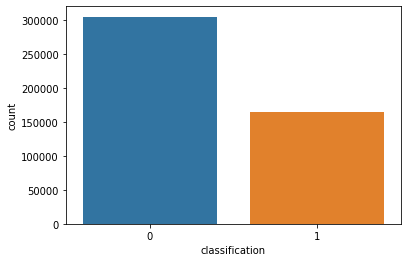

In [12]:
sns.countplot(x='classification', data=df)

<AxesSubplot:xlabel='protocol', ylabel='count'>

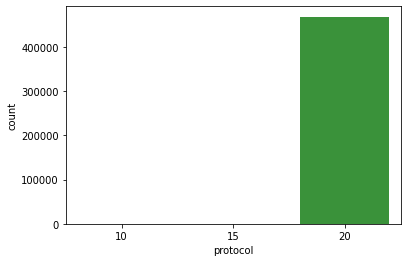

In [13]:
sns.countplot(x='protocol', data=df)

In [14]:
from sklearn.metrics import roc_curve,auc
# Predicting the Test set results
from sklearn.metrics import confusion_matrix,accuracy_score

def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)


def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
def accuracy(model):
    pred = model.predict(X_test1)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")
    #total_accuracy[str((str(model).split('(')[0]))] = accu


In [15]:
from sklearn import metrics
def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['DDos','normal']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [16]:
## the target varible is the classifcation (0=DDos and 1=normal)
X=df.drop('classification',axis=1)
y=df['classification']

In [17]:
## splitting the dataset into X and y train (80% for training and 20% for testing)
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Assuming you have X (features) and y (target labels) data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
##The line of code X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42) generates a synthetic dataset using the make_classification function from scikit-learn's datasets module. Let me break down what each parameter means:n_samples: This parameter specifies the number of samples (data points) you want to generate in the dataset. In this case, it's generating 1000 samples.n_features: This parameter determines the number of features (input variables) each sample will have. Here, it's generating 10 features for each sample.n_classes: This parameter indicates the number of classes in the target variable. In this case, the dataset has 2 classes, making it a binary classification problem.random_state: This parameter sets the random seed for reproducibility. It ensures that if you run the same code with the same random seed, you'll get the same dataset.


## using ensembled algorithms 

## esmbled model like 
1. stacking 
2. bagging
3. gradient boosting 
4. voting 

In [18]:
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
## supervised machine learning models 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC



## Bagging classifier

In [19]:
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a BaggingClassifier
base_classifier = DecisionTreeClassifier(random_state=42)
bc = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)

# Fit the classifier on the training data
bc.fit(X_train, y_train)
# Make predictions
y_pred = bc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy in Bagging classifier :", accuracy)

Accuracy in Bagging classifier : 0.885




Confusion Matrix:
[[83  6]
 [17 94]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        89
           1       0.94      0.85      0.89       111

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.89       200



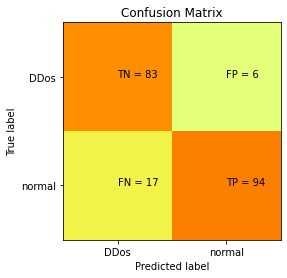

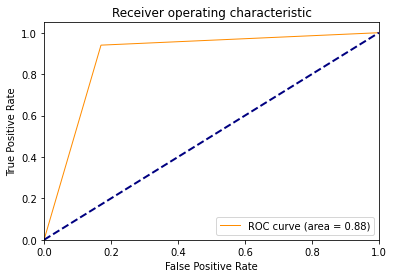

In [20]:
# ... (previous code for dataset, classifier, predictions, etc.)

bc=BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
bc.fit(X_train,y_train)
report_performance(bc)
roc_curves(bc)


## gradient boosting classifier

In [21]:
gbc_model=GradientBoostingClassifier()
gbc_model.fit(X_train,y_train)
y_pred=gbc_model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy in graidentboosting classifier',accuracy)


Accuracy in graidentboosting classifier 0.9




Confusion Matrix:
[[84  5]
 [15 96]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        89
           1       0.95      0.86      0.91       111

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.91      0.90      0.90       200



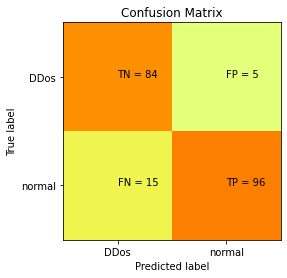

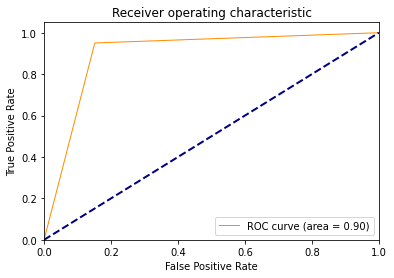

In [22]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
report_performance(gbc)
roc_curves(gbc)

## voting classifier 

In [23]:
# Create individual classifiers for the ensemble
clf1 = LogisticRegression(random_state=42)
clf2 = RandomForestClassifier(random_state=42)
clf3 = SVC(random_state=42)

# Create a VotingClassifier with 'hard' voting strategy
voting_clf = VotingClassifier(estimators=[('clf1', clf1), ('clf2', clf2), ('clf3', clf3)], voting='hard')

# Fit the VotingClassifier on the training data
voting_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_test_voting = voting_clf.predict(X_test)

# Calculate accuracy score
test_accuracy_voting = accuracy_score(y_test, y_pred_test_voting)
print("Accuracy in Voting classifier:", test_accuracy_voting)



Accuracy in Voting classifier: 0.84




Confusion Matrix:
[[78 11]
 [21 90]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        89
           1       0.89      0.81      0.85       111

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200



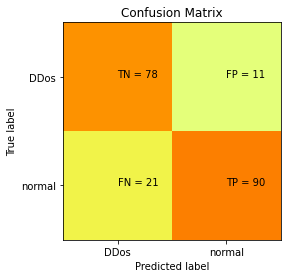

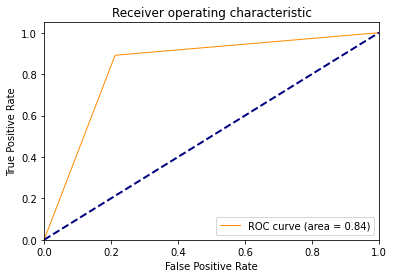

In [24]:
vc=VotingClassifier(estimators=[('clf1', clf1), ('clf2', clf2), ('clf3', clf3)], voting='hard')
vc.fit(X_train,y_train)
report_performance(vc)
roc_curves(vc)

## stacking classifier

In [25]:
base_classifiers = [
    ('decision_tree', DecisionTreeClassifier()),
    ('random_forest', RandomForestClassifier()),
    ('logistic_regression', LogisticRegression())
]


In [26]:
stacking_classifier = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=LogisticRegression()
)


In [27]:
from sklearn.metrics import accuracy_score
stacking_classifier.fit(X_train, y_train)
y_pred = stacking_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy in stacking classifier ", accuracy)



Accuracy in stacking classifier  0.88




Confusion Matrix:
[[80  9]
 [16 95]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        89
           1       0.91      0.86      0.88       111

    accuracy                           0.88       200
   macro avg       0.87      0.88      0.87       200
weighted avg       0.88      0.88      0.88       200



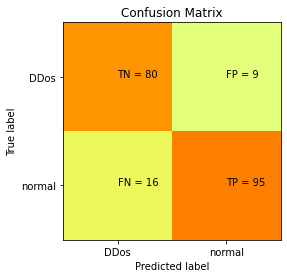

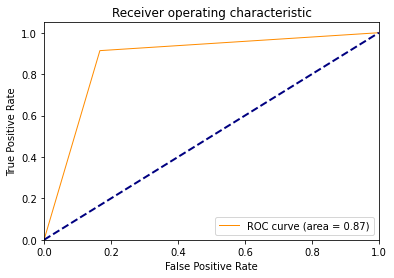

In [28]:
sc=StackingClassifier(
 estimators=base_classifiers,
    final_estimator=LogisticRegression()
)
sc.fit(X_train,y_train)
report_performance(sc)
roc_curves(sc)

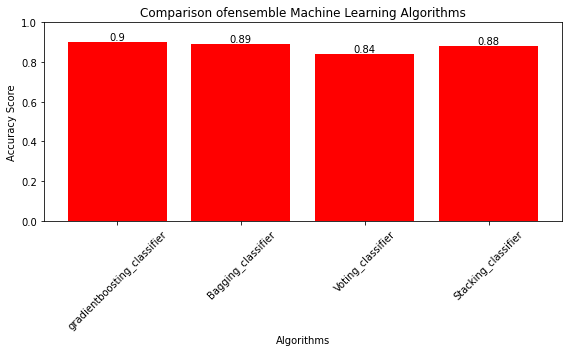

In [29]:
 # Sample data for algorithm performance comparison
algorithms = ['gradientboosting_classifier', 'Bagging_classifier', 'Voting_classifier', 'Stacking_classifier']
accuracy_scores = [0.90, 0.89, 0.84, 0.88]

# Plotting the comparison
plt.figure(figsize=(8, 5))
plt.bar(algorithms, accuracy_scores, color='red')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Comparison ofensemble Machine Learning Algorithms')
plt.ylim(0, 1)  # Set the y-axis limits between 0 and 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the accuracy scores on top of the bars
for i, score in enumerate(accuracy_scores):
    plt.text(i, score, str(score), ha='center', va='bottom')

plt.tight_layout()  # Adjust the layout to prevent overlapping elements
plt.show()


## building a supervised machine learning model using the following model 
1. SVM (support vector machine)
2. KNN (KNearest Neighbor)
3. LOG (Logistic regression)

In [30]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)
y_pred_test_KNN=KNN_model.predict(X_test)
test_accuracy_KNN=accuracy_score(y_test,y_pred_test_KNN)
print('Accuracy in KNN',test_accuracy_KNN)




Accuracy in KNN 0.8




Confusion Matrix:
[[75 14]
 [26 85]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.74      0.84      0.79        89
           1       0.86      0.77      0.81       111

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200



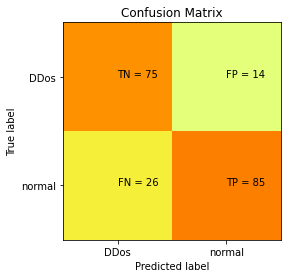

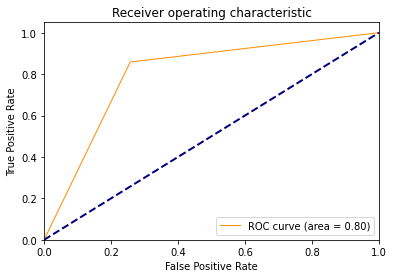

In [31]:
KNN=KNeighborsClassifier()
KNN.fit(X_train,y_train)
report_performance(KNN)
roc_curves(KNN)

In [32]:
LOG_model=LogisticRegression()
LOG_model.fit(X_train,y_train)
y_pred=LOG_model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('accuracy of LOG',accuracy)



accuracy of LOG 0.83




Confusion Matrix:
[[75 14]
 [20 91]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.84      0.82        89
           1       0.87      0.82      0.84       111

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



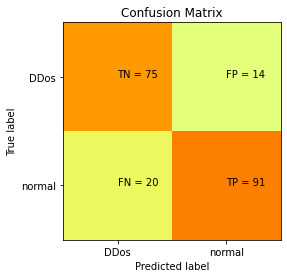

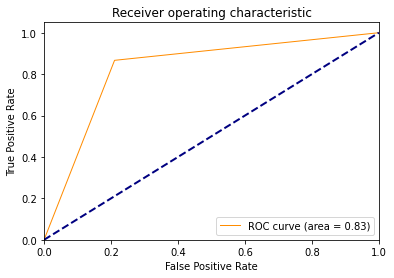

In [33]:
LOG=LogisticRegression()
LOG.fit(X_train,y_train)
report_performance(LOG)
roc_curves(LOG)

In [34]:
svm_model=SVC()
svm_model.fit(X_train,y_train)
y_pred=svm_model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy of svm',accuracy)

Accuracy of svm 0.83




Confusion Matrix:
[[79 10]
 [24 87]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.89      0.82        89
           1       0.90      0.78      0.84       111

    accuracy                           0.83       200
   macro avg       0.83      0.84      0.83       200
weighted avg       0.84      0.83      0.83       200



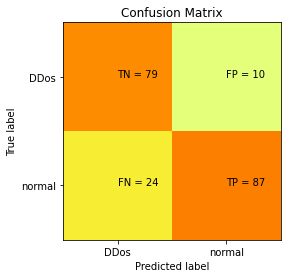

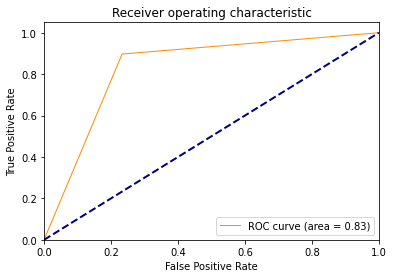

In [35]:
svm=SVC()
svm.fit(X_train,y_train)
report_performance(svm)
roc_curves(svm)

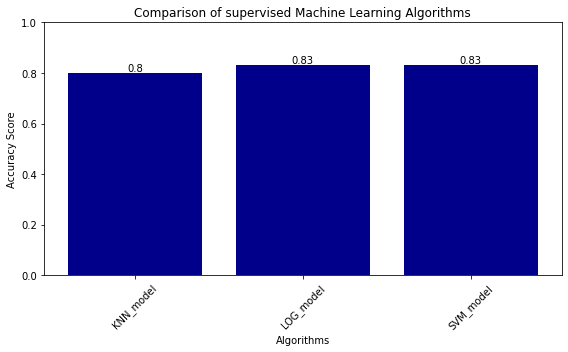

In [36]:
# Sample data for algorithm performance comparison
algorithms = ['KNN_model', 'LOG_model', 'SVM_model']
accuracy_scores = [0.8,0.83,0.83]

# Plotting the comparison
plt.figure(figsize=(8, 5))
plt.bar(algorithms, accuracy_scores, color='darkblue')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Comparison of supervised Machine Learning Algorithms')
plt.ylim(0, 1)  # Set the y-axis limits between 0 and 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the accuracy scores on top of the bars
for i, score in enumerate(accuracy_scores):
    plt.text(i, score, str(score), ha='center', va='bottom')

plt.tight_layout()  # Adjust the layout to prevent overlapping elements
plt.show()


## comparison of both supervised machine learning model and ensemble models 

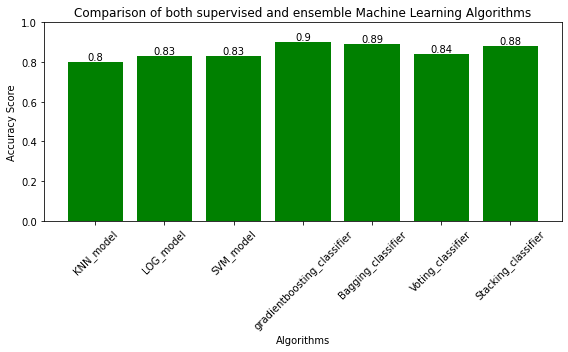

In [37]:
# Sample data for algorithm performance comparison
algorithms = ['KNN_model', 'LOG_model', 'SVM_model','gradientboosting_classifier', 'Bagging_classifier', 'Voting_classifier', 'Stacking_classifier']
accuracy_scores = [0.8,0.83,0.83,0.90, 0.89, 0.84, 0.88]

# Plotting the comparison
plt.figure(figsize=(8, 5))
plt.bar(algorithms, accuracy_scores, color='green')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Comparison of both supervised and ensemble Machine Learning Algorithms')
plt.ylim(0, 1)  # Set the y-axis limits between 0 and 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the accuracy scores on top of the bars
for i, score in enumerate(accuracy_scores):
    plt.text(i, score, str(score), ha='center', va='bottom')

plt.tight_layout()  # Adjust the layout to prevent overlapping elements
plt.show()
